In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [16]:
da=pd.read_csv(r'C:\Users\sanks\OneDrive\Documents\user_behavior_dataset.csv')
d=da.copy(deep=True)

In [17]:
d.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


In [18]:
d.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [19]:
print(d.columns)

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')


In [20]:
d.describe(include='object')

,Device Model,Operating System,Gender
count,700,700,700
unique,5,2,2
top,Xiaomi Mi 11,Android,Male
freq,146,554,364


In [21]:
d.describe(include=['int','float'])

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [22]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [23]:
cols=d.select_dtypes(include='object').columns
for col in cols:
    print(d[col].value_counts())

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64
Operating System
Android    554
iOS        146
Name: count, dtype: int64
Gender
Male      364
Female    336
Name: count, dtype: int64


In [24]:
d.select_dtypes(include=['int','float']).corr()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
User ID,1.000000,-0.024957,-0.014287,-0.019377,-0.023914,-0.014527,0.045188,-0.016242
App Usage Time (min/day),-0.024957,1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498
Screen On Time (hours/day),-0.014287,0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581
Battery Drain (mAh/day),-0.019377,0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587
Number of Apps Installed,-0.023914,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255
Data Usage (MB/day),-0.014527,0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734
Age,0.045188,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563
User Behavior Class,-0.016242,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000


In [25]:
#high positive correlation between the usage-related features and the user class can be seen

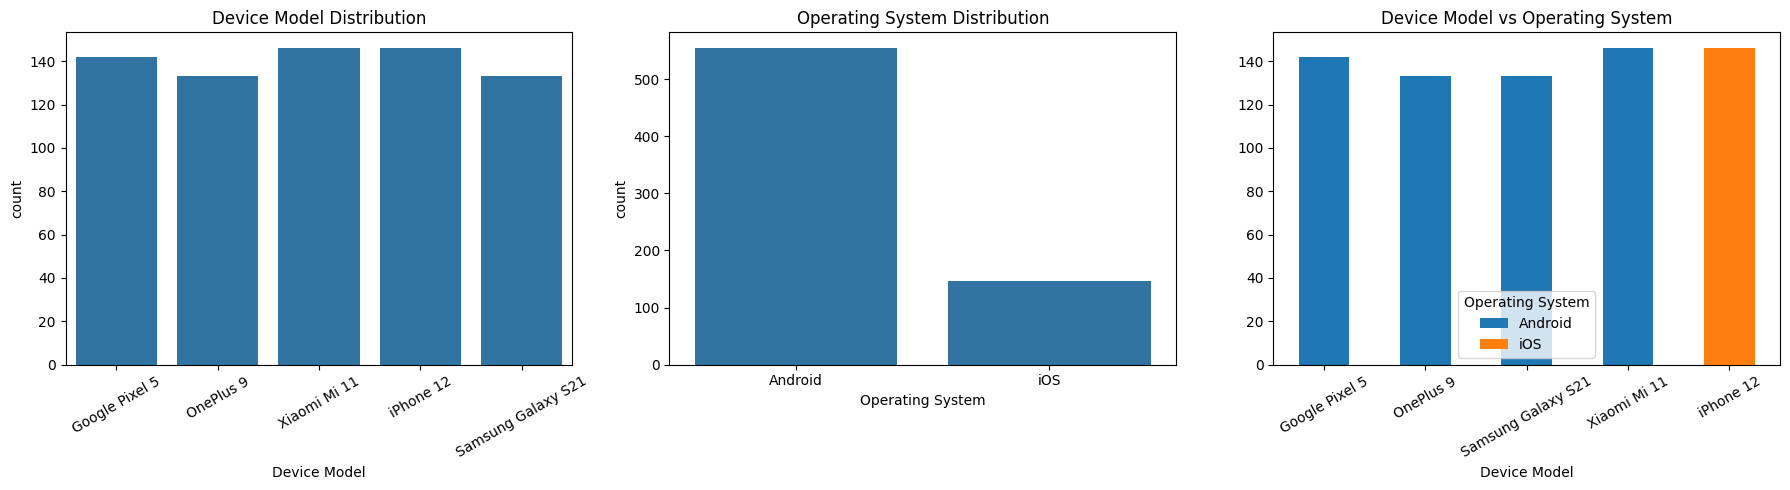

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

device_os_ct = pd.crosstab(
    d['Device Model'],
    d['Operating System']
)

fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.countplot(data=d, x='Device Model', ax=axes[0])
axes[0].set_title("Device Model Distribution")
axes[0].tick_params(axis='x', rotation=30)

sns.countplot(data=d, x='Operating System', ax=axes[1])
axes[1].set_title("Operating System Distribution")

device_os_ct.plot(
    kind='bar',
    stacked=True,
    ax=axes[2]
)
axes[2].set_title("Device Model vs Operating System")
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


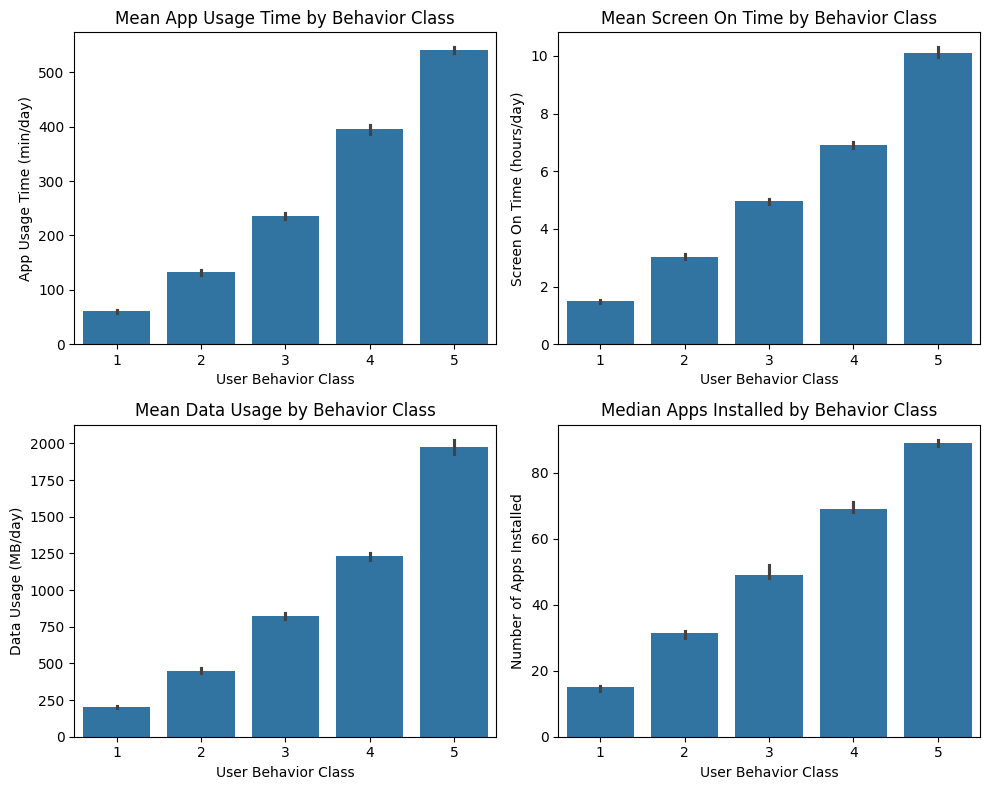

In [27]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
sns.barplot(data=d, x='User Behavior Class', y='App Usage Time (min/day)', estimator=np.mean)
plt.title("Mean App Usage Time by Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("App Usage Time (min/day)")

plt.subplot(2, 2, 2)
sns.barplot(data=d, x='User Behavior Class', y='Screen On Time (hours/day)', estimator=np.mean)
plt.title("Mean Screen On Time by Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Screen On Time (hours/day)")

plt.subplot(2, 2, 3)
sns.barplot(data=d, x='User Behavior Class', y='Data Usage (MB/day)', estimator=np.mean)
plt.title("Mean Data Usage by Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Data Usage (MB/day)")

plt.subplot(2, 2, 4)
sns.barplot(data=d, x='User Behavior Class', y='Number of Apps Installed', estimator=np.median)
plt.title("Median Apps Installed by Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Number of Apps Installed")

plt.tight_layout()
plt.show()

In [28]:
#the analysis shows monotonic and near-linear trends between usage features and the target classes. 
#this suggests the use of logistic regression as a baseline model, and its performance will be validated against Random Forest classifier.

In [29]:
age_bins = [0, 20, 35, 50, 65, 80]
age_labels = ['0–20', '20–35', '35–50', '50–65', '65–80']

d['Age Group'] = pd.cut(d['Age'], bins=age_bins, labels=age_labels, right=False)

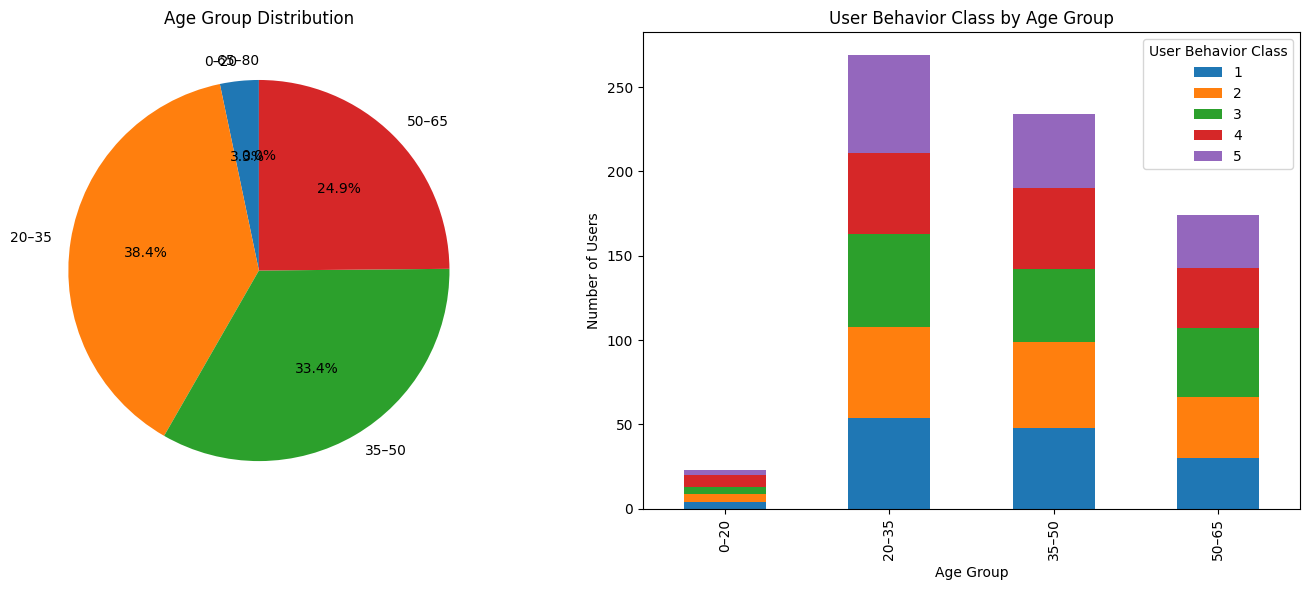

In [30]:

age_behavior_ct = pd.crosstab(d['Age Group'], d['User Behavior Class'])
fig, axes = plt.subplots(1, 2, figsize=(14,6))

age_counts = d['Age Group'].value_counts().sort_index()

axes[0].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Age Group Distribution")

age_behavior_ct.plot(kind='bar', stacked=True, ax=axes[1])

axes[1].set_title("User Behavior Class by Age Group")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("Number of Users")
axes[1].legend(title="User Behavior Class")

plt.tight_layout()
plt.show()


In [31]:
# although the age distribution is uneven, the user class is not much influenced by the age group.

In [32]:
# creating additional ratio based features
d['Usage_per_App'] = d['App Usage Time (min/day)'] / d['Number of Apps Installed']
d['Data_per_Hour'] = d['Data Usage (MB/day)'] / d['Screen On Time (hours/day)']
d['Drain_per_Hour'] = d['Battery Drain (mAh/day)'] / d['Screen On Time (hours/day)']


In [33]:
d['User Behavior Class'].value_counts(normalize=True) * 100


User Behavior Class
2    20.857143
3    20.428571
4    19.857143
5    19.428571
1    19.428571
Name: proportion, dtype: float64

In [34]:
X = d.drop(columns=['User Behavior Class', 'User ID', 'Device Model'])
y = d['User Behavior Class']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [42]:
#data preprocessing
num_cols = ['App Usage Time (min/day)',
    'Screen On Time (hours/day)',
    'Battery Drain (mAh/day)',
    'Number of Apps Installed',
    'Data Usage (MB/day)',
    'Age',
    'Usage_per_App',
    'Data_per_Hour',
    'Drain_per_Hour']

cat_os = ['Operating System']
cat_gender = ['Gender']
cat_age_group = ['Age Group']
age_group_order = [['0–20', '20–35', '35–50', '50–65', '65–80']]

ct_lr=ColumnTransformer([('OHencoder_lr',OneHotEncoder(drop='first'),['Operating System']),
                      ('g_encoder_lr',OneHotEncoder(drop='first'),['Gender']),
                      ('age_encoder_lr',OrdinalEncoder(categories=age_group_order),['Age Group']),
                      ('scaler_lr',StandardScaler(),num_cols)],
                     remainder='passthrough')


In [43]:
# logistic Regression was used as a baseline model due to the near-linear separation observed in EDA, and Random Forest was used to compare performance with a non-linear model

In [44]:
pipe_lr=Pipeline(steps=[('preprocessing',ct_lr),('LR_model',LogisticRegression(max_iter=1000,multi_class='multinomial',solver='lbfgs'))])
pipe_lr.fit(X_train,y_train)

C:\Users\sanks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHencoder_lr',
                                                  OneHotEncoder(drop='first'),
                                                  ['Operating System']),
                                                 ('g_encoder_lr',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('age_encoder_lr',
                                                  OrdinalEncoder(categories=[['0–20',
                                                                              '20–35',
                                                                              '35–50',
                                                                              '50–65',
                                                                              '65–80']]),
                                                  ['Age Group']),
                                                 ('scaler_lr', StandardScaler(),
                                                  ['App Usage Time (min/day)',
                                                   'Screen On Time (hours/day)',
                                                   'Battery Drain (mAh/day)',
                                                   'Number of Apps Installed',
                                                   'Data Usage (MB/day)', 'Age',
                                                   'Usage_per_App',
                                                   'Data_per_Hour',
                                                   'Drain_per_Hour'])])),
                ('LR_model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [45]:
print(pipe_lr.named_steps['LR_model'].coef_)
print(pipe_lr.named_steps['LR_model'].intercept_)
y_pred_lr = pipe_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
macro_f1 = f1_score(y_test, y_pred_lr, average='macro')
cm = confusion_matrix(y_test, y_pred_lr)

print("Accuracy:", accuracy)
print("Macro F1:", macro_f1)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

[[-1.47121472e-01  1.91229546e-01 -3.43695523e-02 -2.82969644e+00
  -3.49360833e+00 -3.75477383e+00 -4.18830183e+00 -2.53254619e+00
  -6.89622103e-03 -4.26279707e-01 -5.46760004e-01  4.09398994e-01]
 [ 5.25796230e-02  1.49330287e-01 -5.51292408e-02 -1.25906497e+00
  -1.13438171e+00 -1.67743200e+00 -1.22523521e+00 -1.41174547e+00
   1.18352035e-01 -2.96507526e-01 -2.24418973e-01  1.95512218e-01]
 [ 7.43428998e-04 -2.46531419e-01  1.80079215e-01 -2.63906070e-01
   1.58719855e-01  5.90541649e-01  3.68022201e-01 -6.01965999e-02
  -1.09854126e-01 -1.73431926e-01  2.67753895e-02  7.99337698e-02]
 [-1.21947936e-01 -9.51728228e-02 -1.28489968e-02  1.41179384e+00
   1.31820178e+00  1.82259617e+00  2.11547501e+00  1.02066472e+00
   1.34199294e-01  3.96520165e-01  2.74806867e-01 -1.45910790e-01]
 [ 2.15746357e-01  1.14440932e-03 -7.77314250e-02  2.94087363e+00
   3.15106841e+00  3.01906801e+00  2.93003982e+00  2.98382354e+00
  -1.35800982e-01  4.99698994e-01  4.69596721e-01 -5.38934191e-01]]
[-8.

In [46]:
#Random Forest Classifier

In [47]:

rf = RandomForestClassifier(n_estimators=300, random_state=42, max_features='sqrt')
ct_rf = ColumnTransformer([('OHencoder_rf',OneHotEncoder(drop='first'),['Operating System']),
    ('g_encoder_rf',OneHotEncoder(drop='first'),['Gender']),
    ('ordinal_enc_rf', OrdinalEncoder(categories=age_group_order), ['Age Group'])], remainder='passthrough')
pipe_rf = Pipeline(steps=[('preprocessing', ct_rf), ('model', RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=10, min_samples_leaf=5, random_state=42))])
pipe_rf.fit(X_train, y_train)


C:\Users\sanks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHencoder_rf',
                                                  OneHotEncoder(drop='first'),
                                                  ['Operating System']),
                                                 ('g_encoder_rf',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('ordinal_enc_rf',
                                                  OrdinalEncoder(categories=[['0–20',
                                                                              '20–35',
                                                                              '35–50',
                                                                              '50–65',
                                                                              '65–80']]),
                                                  ['Age Group'])])),
                ('model',
                 RandomForestClassifier(min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=300,
                                        n_jobs=-1, random_state=42))])

In [48]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_rf = pipe_rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        34

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [49]:
#Both Logistic Regression and Random Forest models achieved perfect classification performance. 
#This is likely because the target variable is strongly influenced by the usage-related features such as app usage time, screen-on time, and data consumption, which show clear monotonic trends across user behavior classes.
#As a result, the classes are almost linearly separable.
#The model’s strong performance suggests that the dataset is well-behaved,
#with clear linear relationships between features and the target variable.